In [189]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use(style="seaborn-v0_8-talk")
sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_csv('./data/EIS_state_I_25C05.txt', sep='\t')

In [4]:
df.describe()

,time/s,cycle number,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,|Z|/Ohm,Phase(Z)/deg
count,1.997900e+04,19979.000000,19979.000000,19979.000000,19979.000000,19979.000000,19979.000000
mean,2.311582e+06,166.991891,1596.991409,2.876774,1.306696,3.258517,-10.431472
std,1.256262e+06,96.126365,3909.581428,16.439261,11.570930,20.087335,8.279227
min,7.360180e+03,1.000000,0.019990,0.361450,-0.022290,0.362140,-65.248800
25%,1.228601e+06,84.000000,0.670720,0.622610,0.091705,0.631560,-12.394260
50%,2.394491e+06,167.000000,22.482020,0.984040,0.148740,1.018470,-9.392950
75%,3.461088e+06,250.000000,675.497070,1.452100,0.252120,1.462280,-5.834295
max,4.231062e+06,333.000000,20004.453000,425.992740,405.570770,581.970760,3.528610


In [9]:
df.keys()

Index(['time/s', 'cycle number', 'freq/Hz', 'Re(Z)/Ohm', '-Im(Z)/Ohm',
       '   |Z|/Ohm', '   Phase(Z)/deg'],
      dtype='object')

In [10]:
df_cycle = df.groupby('cycle number')
df_cycle.describe()

time/s                                                       \
              count          mean        std           min           25%   
cycle number                                                               
1.0            60.0  7.546877e+03  52.905366  7.520784e+03  7.523898e+03   
2.0            60.0  2.369679e+04  52.905367  2.367070e+04  2.367381e+04   
3.0            60.0  3.960142e+04  52.905306  3.957533e+04  3.957844e+04   
4.0            60.0  5.535752e+04  52.905166  5.533143e+04  5.533455e+04   
5.0            60.0  7.101376e+04  52.905369  7.098767e+04  7.099079e+04   
...             ...           ...        ...           ...           ...   
346.0          60.0  4.631848e+06  52.905371  4.631822e+06  4.631825e+06   
347.0          60.0  4.642048e+06  52.905096  4.642022e+06  4.642025e+06   
348.0          60.0  4.651995e+06  52.905398  4.651968e+06  4.651972e+06   
349.0          60.0  4.661932e+06  52.905413  4.661905e+06  4.661909e+06   
350.0          60.0  4.671846e+06  52.905428  4.671820e+06  4.671823e+06   

                                                       freq/Hz              \
                       50%           75%           max   count        mean   
cycle number                                                                 
1.0           7.527396e+03  7.536231e+03  7.791700e+03    60.0  1596.91148   
2.0           2.367731e+04  2.368615e+04  2.394162e+04    60.0  1596.91148   
3.0           3.958194e+04  3.959078e+04  3.984625e+04    60.0  1596.91148   
4.0           5.533804e+04  5.534688e+04  5.560235e+04    60.0  1596.91148   
5.0           7.099428e+04  7.100312e+04  7.125859e+04    60.0  1596.91148   
...                    ...           ...           ...     ...         ...   
346.0         4.631828e+06  4.631837e+06  4.632092e+06    60.0  1596.91148   
347.0         4.642028e+06  4.642037e+06  4.642293e+06    60.0  1596.91148   
348.0         4.651975e+06  4.651984e+06  4.652239e+06    60.0  1596.91148   
349.0         4.661912e+06  4.661921e+06  4.662176e+06    60.0  1596.91148   
350.0         4.671827e+06  4.671836e+06  4.672091e+06    60.0  1596.91148   

              ...    |Z|/Ohm             Phase(Z)/deg                      \
              ...        75%      max           count      mean       std   
cycle number  ...                                                           
1.0           ...   1.355830  1.60358            60.0 -8.422574  4.445198   
2.0           ...   1.347475  1.59516            60.0 -8.267860  4.376111   
3.0           ...   1.345007  1.60614            60.0 -8.229162  4.350009   
4.0           ...   1.341205  1.59074            60.0 -8.217105  4.339441   
5.0           ...   1.339552  1.60498            60.0 -8.208480  4.355162   
...           ...        ...      ...             ...       ...       ...   
346.0         ...   2.057637  2.51006            60.0 -9.937290  5.561480   
347.0         ...   2.056363  2.50358            60.0 -9.857654  5.521918   
348.0         ...   2.057020  2.55801            60.0 -9.850380  5.557775   
349.0         ...   2.060973  2.50933            60.0 -9.925383  5.562101   
350.0         ...   2.064845  2.52319            60.0 -9.923010  5.572716   

                                                                
                   min        25%       50%       75%      max  
cycle number                                                    
1.0          -14.38264 -12.632115 -9.010520 -4.763822  4.21264  
2.0          -14.04855 -12.393535 -8.742385 -4.646720  3.95623  
3.0          -14.01443 -12.153163 -8.758970 -4.574585  3.94696  
4.0          -13.97994 -12.145502 -8.592645 -4.621868  3.94667  
5.0          -13.98074 -12.308620 -8.669955 -4.608005  4.05400  
...                ...        ...       ...       ...      ...  
346.0        -21.72965 -13.172103 -9.120730 -6.235133  3.10367  
347.0        -21.47639 -12.813917 -9.011585 -6.223840  3.13134  
348.0        -21.12462 -12.953973 -8.977855 -6.315128  3.0914

In [5]:
def read_data(eis_file):
    EIS_list = []

    # eis in EIS_list:
    """
    eis = {
        cycle: int,
        size: int,
        freq: [],
        Re: [],
        Im: [],
    }
    """
    
    df_eis = pd.read_csv(eis_file, sep='\t').groupby('cycle number')
    for cycle, df in df_eis:
        freq = df['freq/Hz'].values
        Re = df['Re(Z)/Ohm'].values
        Im_neg = df['-Im(Z)/Ohm'].values
        size = len(freq)
        eis = {
            'cycle': cycle,
            'size': size,
            'freq': freq,
            'Re': Re,
            '-Im': Im_neg,
        }
        EIS_list.append(eis)

    
    return EIS_list

In [6]:
EIS1 = read_data('./data/EIS_state_I_25C05.txt')
EIS2 = read_data('./data/EIS_state_II_25C05.txt')
EIS3 = read_data('./data/EIS_state_III_25C05.txt')
EIS4 = read_data('./data/EIS_state_IV_25C05.txt')
EIS5 = read_data('./data/EIS_state_V_25C05.txt')
EIS6 = read_data('./data/EIS_state_VI_25C05.txt')
EIS9 = read_data('./data/EIS_state_IX_25C05.txt')


In [7]:
print(f"EIS1: {len(EIS1)}")
print(f"EIS2: {len(EIS2)}")
print(f"EIS3: {len(EIS3)}")
print(f"EIS4: {len(EIS4)}")
print(f"EIS5: {len(EIS5)}")
print(f"EIS6: {len(EIS6)}")
print(f"EIS9: {len(EIS9)}")

EIS1: 333
EIS2: 276
EIS3: 276
EIS4: 276
EIS5: 275
EIS6: 275
EIS9: 332


选择配色方案（sns的color_palette）

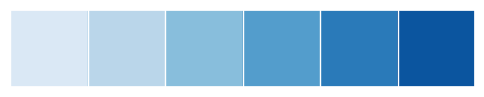

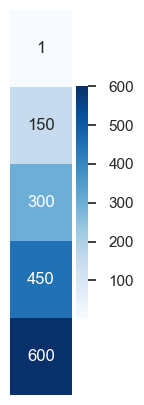

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PALETTE = "Blues"
sns.palplot(sns.color_palette(PALETTE))
matrix = np.linspace(1, 600, 5).reshape(5, 1).astype(int)
fig = plt.figure(figsize=(1, 5))
sns_plot = sns.heatmap(
    matrix,
    annot=True,
    cmap=PALETTE,
    cbar=True,
    fmt=".0f",
    xticklabels=False,
    yticklabels=False,
)
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_eis(EIS_list, plot_type='nyquist'):
    palette = sns.color_palette(PALETTE, n_colors=len(EIS_list))
    plt.figure(figsize=(8, 5))  # 稍微增加图的宽度以容纳图例

    if plot_type == 'nyquist':            
        for idx, eis in enumerate(EIS_list):
            plt.plot(eis['Re'], eis['-Im'], color=palette[idx], label=f'{eis["cycle"]}')
        plt.title("EIS Curve (Nyquist)", fontsize=18)
        plt.xlabel("Re(Z)", fontsize=16)
        plt.ylabel("-Im(Z)", fontsize=16)
    
    elif plot_type == 're':
        for idx, eis in enumerate(EIS_list):
            plt.plot(eis['freq'][0:100], eis['Re'][0:100], color=palette[idx], label=f'Cycle {eis["cycle"]}')
        plt.title("EIS Curve (Real)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Re(Z)")
        
    elif plot_type == 'im':
        for idx, eis in enumerate(EIS_list):
            plt.plot(eis['freq'], eis['-Im'], color=palette[idx], label=f'Cycle {eis["cycle"]}')
        plt.title("EIS Curve (Imaginary)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("-Im(Z)")
        
    # plt.legend(title="", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=0.1, title_fontsize='large')
    
    # plt.ylim(-0.01, 0.005)
    # plt.subplots_adjust(right=0.75)
    plt.show()
    

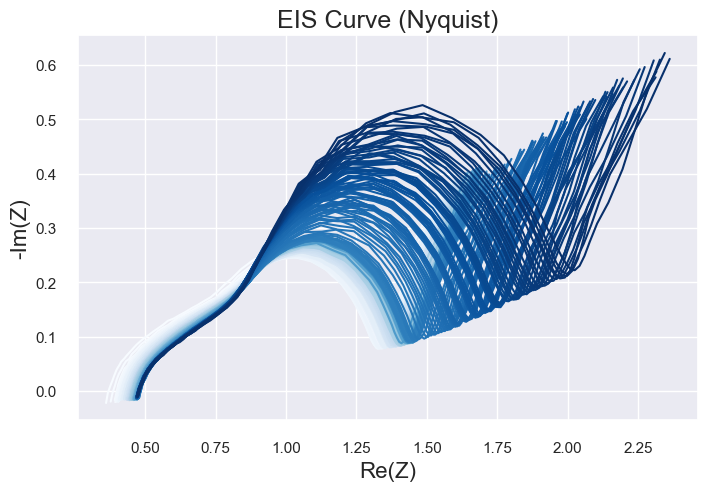

In [18]:
plot_eis(EIS1[0:275])

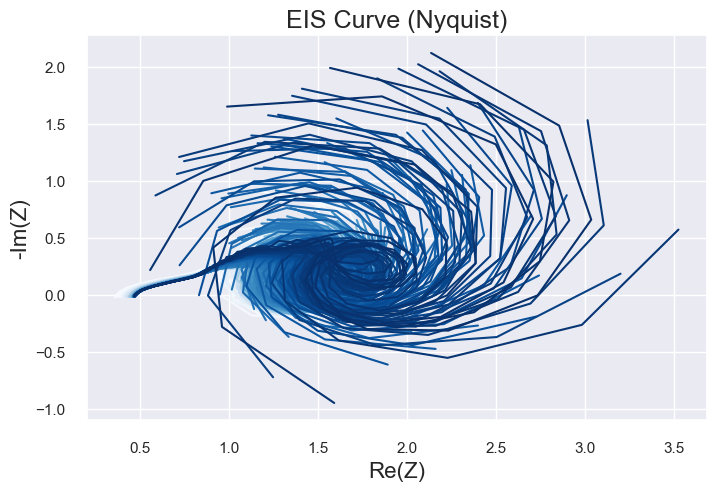

In [19]:
plot_eis(EIS2[0:275])

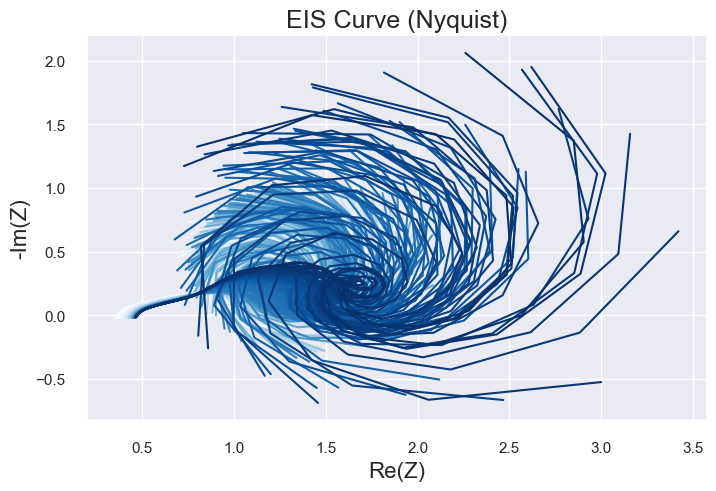

In [21]:
plot_eis(EIS3[0:275])

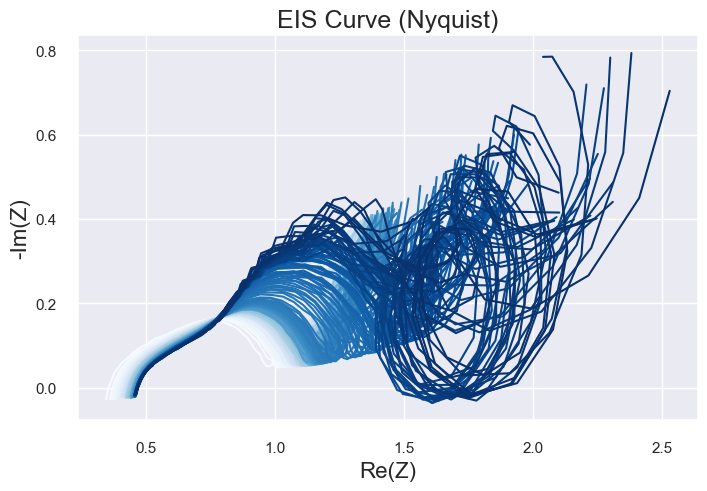

In [22]:
plot_eis(EIS4[0:275])

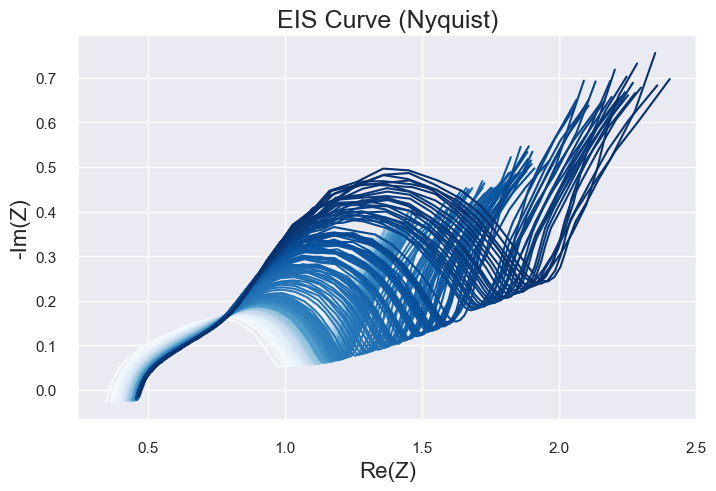

In [23]:
plot_eis(EIS5[0:275])

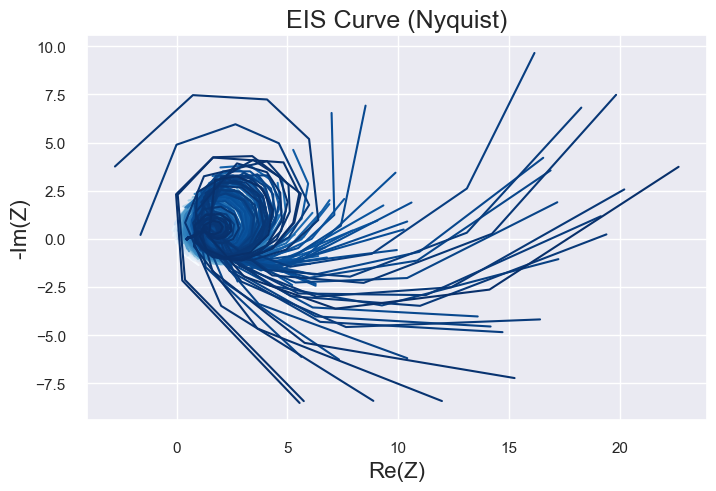

In [24]:
plot_eis(EIS6[0:275])

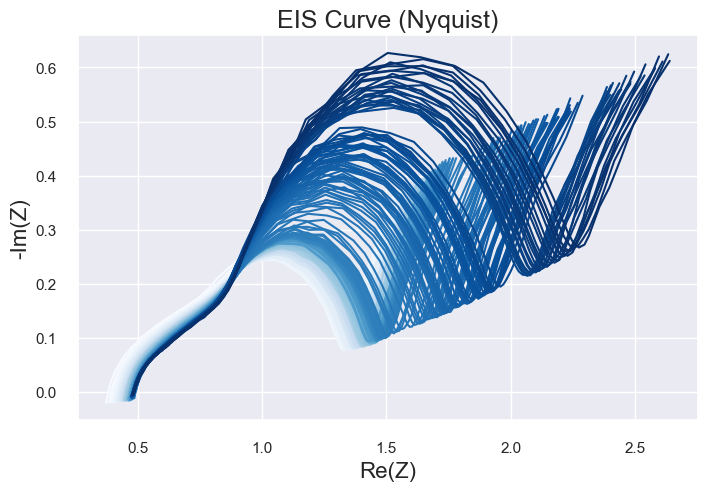

In [25]:
plot_eis(EIS9[0:275])

EIS5 的结果相对较好，对它进行更多观测

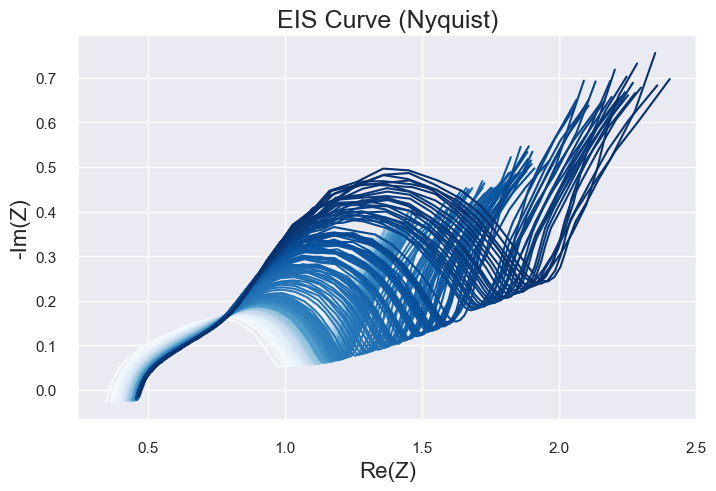

In [26]:
plot_eis(EIS5)

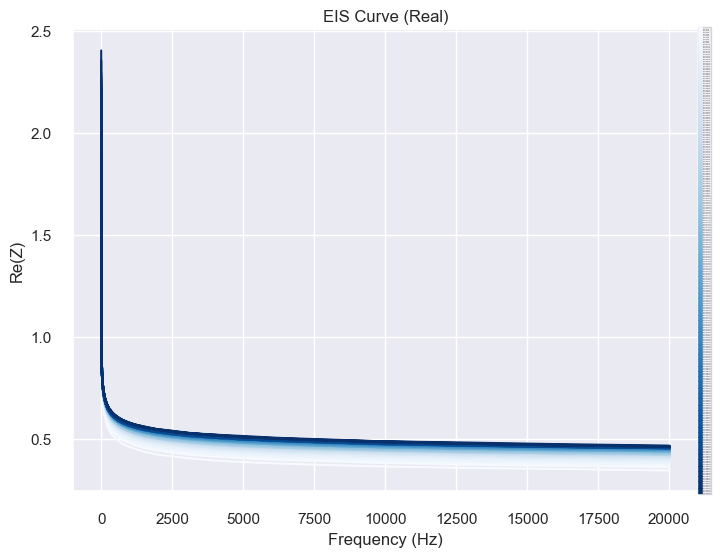

In [90]:
plot_eis(EIS5, plot_type='re')

20004.453 2430.7778


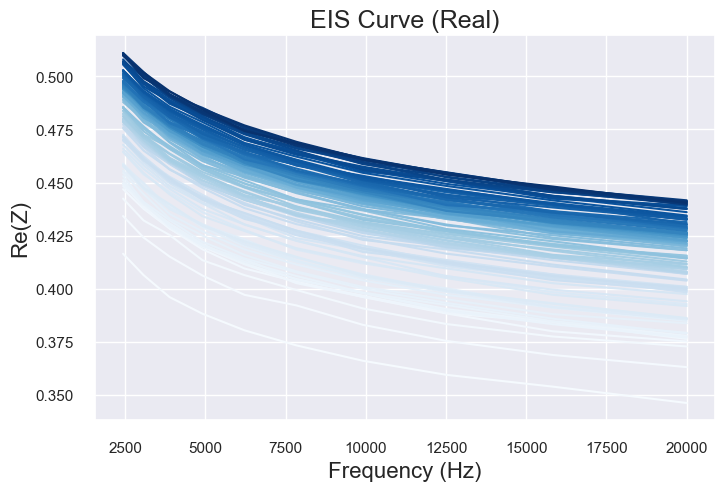

In [30]:
start = 0
end = 10

palette = sns.color_palette(PALETTE, n_colors=125)
plt.figure(figsize=(8, 5))
for idx, eis in enumerate(EIS5[0:125]):
    plt.plot(eis['freq'][start:end], eis['Re'][start:end], color=palette[idx])
plt.title("EIS Curve (Real)", fontsize=18)
plt.xlabel("Frequency (Hz)", fontsize=16)
plt.ylabel("Re(Z)", fontsize=16)

print(eis['freq'][start], eis['freq'][end-1])
plt.show()

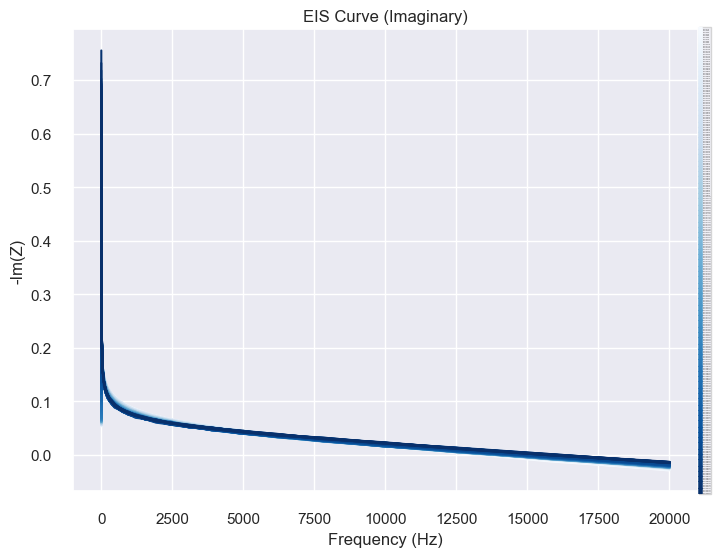

In [76]:
plot_eis(EIS5, plot_type='im')

20004.453 2430.7778


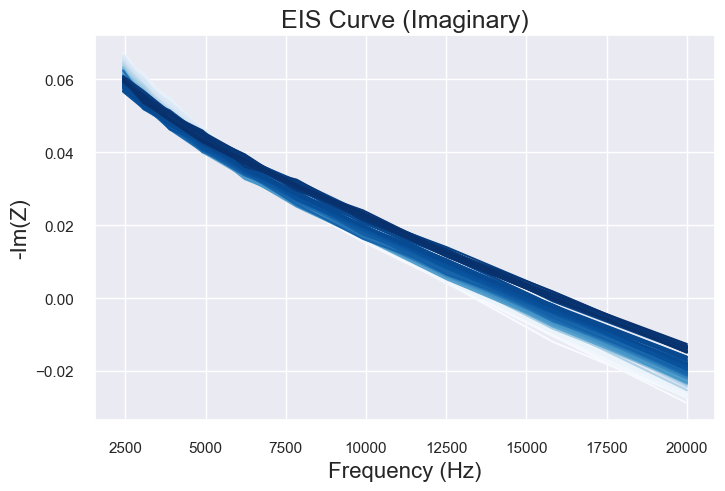

In [31]:
start = 0
end = 10

palette = sns.color_palette(PALETTE, n_colors=len(EIS5))
plt.figure(figsize=(8, 5))
for idx, eis in enumerate(EIS5):
    plt.plot(eis['freq'][start:end], eis['-Im'][start:end], color=palette[idx])
plt.title("EIS Curve (Imaginary)", fontsize=18)
plt.xlabel("Frequency (Hz)", fontsize=16)
plt.ylabel("-Im(Z)", fontsize=16)

print(eis['freq'][start], eis['freq'][end-1])
plt.show()

将eis保存为numpy数组，并储存为feature文件

In [132]:
import numpy as np

features = []

for eis in EIS5:
    # features.append(list(eis['Re']) + list(eis['-Im']))
    features.append(list(eis['Re'][0:20]))
    
features = np.array(features)

print(features.shape)

(275, 20)


In [136]:
np.save('features.npy', features)

三维EIS + 波峰波谷

In [200]:
import pickle

# 将对象保存到文件
with open("EIS5.pickle", "wb") as f:
    pickle.dump(EIS5, f)

In [ ]:
import pickle

# 从文件中加载对象
with open("data.pickle", "rb") as f:
    loaded_data = pickle.load(f)

print(loaded_data)  # 输出: {'name': 'Alice', 'age': 30, 'city': 'New York'}

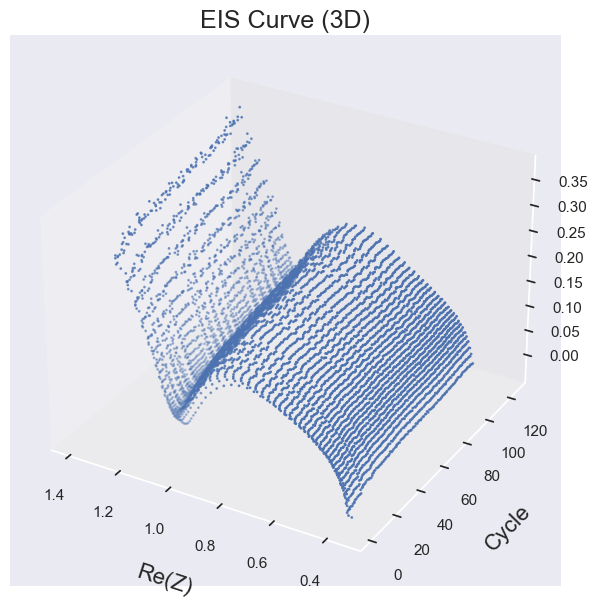

In [198]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_eis_3d(EIS_list):
    fig = plt.figure()
    
    left = 0.1    # 子图左侧边界距离图形左侧边界的距离
    bottom = 0.1  # 子图底部边界距离图形底部边界的距离
    width = 0.7   # 子图宽度占图形宽度的比例
    height = 0.4  # 子图高度占图形高度的比例
    
    ax = fig.add_subplot(111, projection='3d')
    # ax = fig.add_subplot(111, projection='3d', position=[left, bottom, width, height])
    
    # 调整子图的位置和比例
    # fig.subplots_adjust(left=left, bottom=bottom, right=left+width, top=bottom+height)
    # ax.view_init(elev=10, azim=-50)

    for eis in EIS_list:
        ax.scatter(eis['Re'], [eis['cycle']] * len(eis['Re']), eis['-Im'], s=1, color='b')

    ax.set_title("EIS Curve (3D)", fontsize=18)
    ax.set_xlabel("Re(Z)", fontsize=16, labelpad=20)
    ax.set_ylabel("Cycle", fontsize=16, labelpad=20)
    ax.set_zlabel("-Im(Z)", fontsize=16, labelpad=20)

    ax.xaxis.set_label_position('lower')
    ax.yaxis.set_label_position('lower')
    ax.zaxis.set_label_position('upper')
    
    ax.invert_xaxis()
    
    ax.grid(False)
    ax.set_axis_on()

    
    plt.show()
    
plot_eis_3d(EIS5[0:125])


C:\Users\Haoyu\AppData\Local\Temp\ipykernel_31048\3131978119.py:4: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  x = electrocardiogram()[2000:4000]


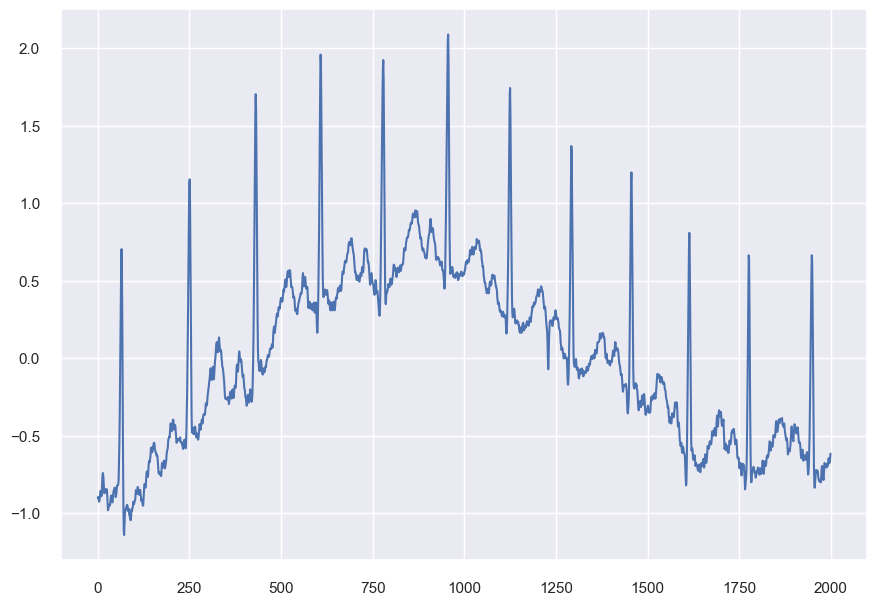

In [202]:
from scipy.misc import electrocardiogram
import matplotlib.pyplot as plt

x = electrocardiogram()[2000:4000]
plt.plot(x)
plt.show()

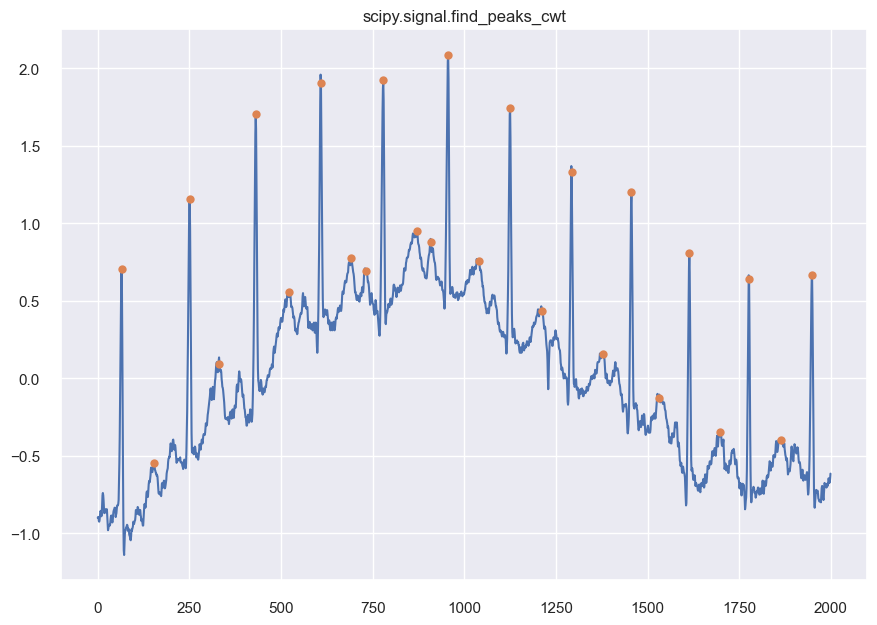

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

peaks = scipy.signal.find_peaks_cwt(x, 5)
plt.plot(x)
plt.plot(peaks, x[peaks], "o")
plt.title("scipy.signal.find_peaks_cwt")
plt.show()

In [227]:
def get_tangent_idx(x_list, y_list):
    tangent = [
        (y_list[i+1] - 0) / (x_list[i+1] - 0)
        for i in range(len(x_list) - 1)
    ]
    return np.argmax(np.array(tangent))

In [247]:
idx = 60

Peek 	idx: 29	freq: 22.48202	Re: 0.87635	-Im: 0.17945
Valley 	idx: 42	freq: 1.07079	Re: 1.10423	-Im: 0.06137
Ohmage 	idx: 1	freq: 15829.126	Re: 0.42624	-Im: -0.00634
Freq1 	idx: 52	freq: 0.10309	Re: 1.17388	-Im: 0.1281
Tan 	idx: 26	freq: 45.3629	Re: 0.78326	-Im: 0.16759


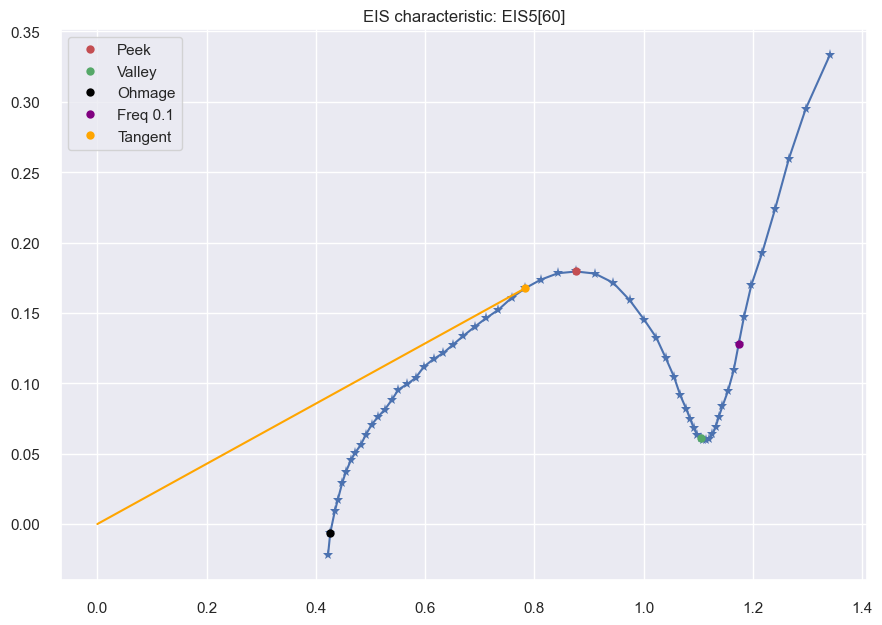

In [248]:

EIS5[idx]["-Im"]

plt.plot(EIS5[idx]["Re"], EIS5[idx]["-Im"], "*-", markersize=8)

# peaks = scipy.signal.find_peaks_cwt(EIS5[idx]["-Im"], 5)
peek = 29
print(
    f"Peek \tidx: {peek}\tfreq: {EIS5[idx]['freq'][peek]}\tRe: {EIS5[idx]['Re'][peek]}\t-Im: {EIS5[idx]['-Im'][peek]}"
)
plt.plot(
    EIS5[idx]["Re"][peek],
    EIS5[idx]["-Im"][peek],
    "ro",
    label="Peek",
)

valley = 42
print(
    f"Valley \tidx: {valley}\tfreq: {EIS5[idx]['freq'][valley]}\tRe: {EIS5[idx]['Re'][valley]}\t-Im: {EIS5[idx]['-Im'][valley]}"
)
plt.plot(
    EIS5[idx]["Re"][valley],
    EIS5[idx]["-Im"][valley],
    "go",
    label="Valley",
)

zero_point_idx = np.argmin(np.abs(np.array(EIS5[idx]["-Im"]) - 0))
print(
    f"Ohmage \tidx: {zero_point_idx}\tfreq: {EIS5[idx]['freq'][zero_point_idx]}\tRe: {EIS5[idx]['Re'][zero_point_idx]}\t-Im: {EIS5[idx]['-Im'][zero_point_idx]}"
)
plt.plot(
    EIS5[idx]["Re"][zero_point_idx],
    EIS5[idx]["-Im"][zero_point_idx],
    "o",
    color="black",
    label="Ohmage",
)

freq_dot1_idx = np.argmin(np.abs(np.array(EIS5[idx]["freq"]) - 0.1))
print(
    f"Freq1 \tidx: {freq_dot1_idx}\tfreq: {EIS5[idx]['freq'][freq_dot1_idx]}\tRe: {EIS5[idx]['Re'][freq_dot1_idx]}\t-Im: {EIS5[idx]['-Im'][freq_dot1_idx]}"
)
plt.plot(
    EIS5[idx]["Re"][freq_dot1_idx],
    EIS5[idx]["-Im"][freq_dot1_idx],
    "o",
    color="purple",
    label="Freq 0.1",
)

tangent_idx = get_tangent_idx(EIS5[idx]["Re"][:valley], EIS5[idx]["-Im"][:valley])
print(
    f"Tan \tidx: {tangent_idx}\tfreq: {EIS5[idx]['freq'][tangent_idx]}\tRe: {EIS5[idx]['Re'][tangent_idx]}\t-Im: {EIS5[idx]['-Im'][tangent_idx]}"
)
plt.plot(
    EIS5[idx]["Re"][tangent_idx],
    EIS5[idx]["-Im"][tangent_idx],
    "o",
    color="orange",
    label="Tangent",
)
plt.plot(
    [0, EIS5[idx]["Re"][tangent_idx]],
    [0, EIS5[idx]["-Im"][tangent_idx]],
    color="orange",
)

plt.legend()

plt.title(f"EIS characteristic: EIS5[{idx}]")
plt.show()

In [264]:
features_eis = []
for idx in range(len(EIS5)):
    eis = EIS5[idx]
    feature = []
    
    peek = 29
    feature.append(eis['Re'][peek])
    feature.append(eis['-Im'][peek])
    feature.append(np.sqrt(eis["Re"][peek] ** 2 + eis["-Im"][peek] ** 2))
    
    valley = 42
    feature.append(eis['Re'][valley])
    feature.append(eis['-Im'][valley])
    feature.append(np.sqrt(eis["Re"][valley] ** 2 + eis["-Im"][valley] ** 2))
    
    zero_point_idx = np.argmin(np.abs(np.array(eis["-Im"]) - 0))
    feature.append(eis['Re'][zero_point_idx])
    feature.append(eis['-Im'][zero_point_idx])
    feature.append(np.sqrt(eis["Re"][zero_point_idx] ** 2 + eis["-Im"][zero_point_idx] ** 2))
    
    freq_dot1_idx = np.argmin(np.abs(np.array(eis["freq"]) - 0.1))
    feature.append(eis['Re'][freq_dot1_idx])
    feature.append(eis['-Im'][freq_dot1_idx])
    feature.append(np.sqrt(eis["Re"][freq_dot1_idx] ** 2 + eis["-Im"][freq_dot1_idx] ** 2))
    
    tangent_idx = get_tangent_idx(eis["Re"][:valley], eis["-Im"][:valley])
    feature.append(eis['Re'][tangent_idx])
    feature.append(eis['-Im'][tangent_idx])
    feature.append(np.sqrt(eis["Re"][tangent_idx] ** 2 + eis["-Im"][tangent_idx] ** 2))
    
    features_eis.append(feature)
    
features_eis = np.array(features_eis)

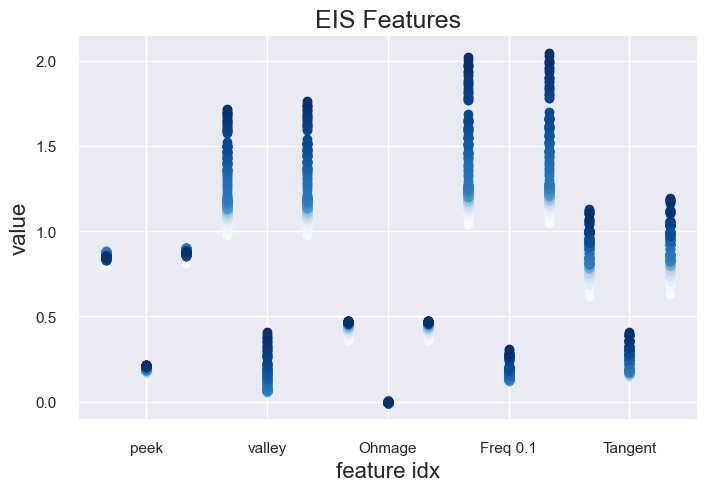

In [274]:
palette = sns.color_palette(PALETTE, n_colors=len(features_eis))
plt.figure(figsize=(8, 5))  # 稍微增加图的宽度以容纳图例

for idx, feature in enumerate(features_eis):
    plt.scatter(range(len(feature)), feature, color=palette[idx])
plt.title("EIS Features", fontsize=18)
plt.xlabel("feature idx", fontsize=16)
plt.ylabel("value", fontsize=16)

plt.xticks([1, 4, 7, 10, 13], ['peek', 'valley', 'Ohmage', 'Freq 0.1', 'Tangent'])

plt.show()

In [275]:
np.save('features_eis.npy', features_eis)